# P3 Example Exam

In [302]:
from termcolor import colored # type: ignore                                          # Colored text
from random import Random  # type: ignore                                             # Random number generator
import math  # type: ignore                                                           # Mathematical functions
import pandas as pd  # type: ignore                                                   # Data manipulation
import numpy as np  # type: ignore                                                    # Scientific computing
import matplotlib.pyplot as plt  # type: ignore                                       # Data visualization
from scipy.stats import binom as binomial  # type: ignore                             # Binomial distribution
from scipy.stats import norm as normal  # type: ignore                                # Normal distribution
from scipy.stats import poisson as poisson  # type: ignore                            # Poisson distribution
from scipy.stats import t as student  # type: ignore                                  # Student distribution
from scipy.stats import chi2  # type: ignore                                          # Chi-squared distribution
from scipy.stats import ttest_1samp  # type: ignore                                   # One-sample t-test
from scipy.stats import chisquare  # type: ignore                                     # Chi-squared test
from scipy.special import comb  # type: ignore                                        # Combinations
from mlxtend.frequent_patterns import apriori  # type: ignore                         # Apriori algorithm
from mlxtend.frequent_patterns import fpgrowth  # type: ignore                        # FP-growth algorithm
from mlxtend.frequent_patterns import association_rules  # type: ignore               # Association rules
from mlxtend.preprocessing import TransactionEncoder  # type: ignore                  # Transaction encoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # type: ignore  # Discriminant Analysis
from tensorflow import keras  # type: ignore                                          # Deep Learning library
from tensorflow.keras import Model  # type: ignore                                    # Model class
from tensorflow.keras.layers import Input, Dense, BatchNormalization  # type: ignore  # Layers
from tensorflow.keras.utils import to_categorical  # type: ignore                     # One-hot encoding
from tensorflow.keras.optimizers import Adam  # type: ignore                          # Optimizer
from livelossplot import PlotLossesKeras  # type: ignore                              # Live plot
from keras.src.optimizers import RMSprop  # type: ignore                              # Optimizer
from sklearn.model_selection import train_test_split  # type: ignore                  # Train-test split
from sklearn.metrics import roc_auc_score # type: ignore                              # ROC AUC score
from simanneal import Annealer  # type: ignore                                        # Simulated Annealing
from inspyred import ec  # type: ignore                                               # Evolutionary Computation
import warnings  # type: ignore                                                       # Disable warnings
from Resources.Functions import *  # type: ignore                                     # Custom functions
warnings.filterwarnings("ignore")                                                     # Disable warnings
outputColor = "blue"                                                                  # Color for the output

In [303]:
def rule_filter(row, min_len, max_len):
    length = len(row['antecedents']) + len(row['consequents'])
    return min_len <= length <= max_len

def get_item_list (string):
    items = string [1:-1]
    return items.split(';')

def plot_confidence_interval(population_size, sample_mean, sample_standard_deviation, degrees_freedom, plot_factor):
    margin_of_error = plot_factor * sample_standard_deviation / np.sqrt(population_size)
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error

    # Plotting the confidence interval
    plt.figure(figsize=(10, 6))
    x_axis = np.linspace(sample_mean - 3 * sample_standard_deviation, sample_mean + 3 * sample_standard_deviation, 1000)
    y_axis = student.pdf(x_axis, degrees_freedom, loc=sample_mean, scale=sample_standard_deviation / np.sqrt(population_size))

    plt.plot(x_axis, y_axis, label='t-distribution')
    plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
    plt.axvline(upper_bound, color='blue', linestyle='--', label='Upper Bound')
    plt.axvline(sample_mean, color='green', linestyle='-', label='Sample Mean')

    # Mark the confidence interval
    plt.fill_betweenx(y_axis, lower_bound, upper_bound, where=(x_axis >= lower_bound) & (x_axis <= upper_bound), color='orange', label='Confidence Interval')

    plt.title('Confidence Interval Plot')
    plt.xlabel('Sample Mean')
    plt.ylabel('Probability Density Function')
    plt.legend()
    plt.grid(True)
    plt.show()

## Exercises Chance (Week 1)

### Question 1:
You roll `2 dice`.
What is the probability that you roll a `5` and a `2`? (3 significant figures)

In [304]:
# Technique used: Laplace
# P((2 AND 5) OR (5 AND 2))

probability = (1 / 6 * 1 / 6) + (1 / 6 * 1 / 6)
print(colored(f"The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

The probability is as follows: 0.0556 or 5.5556%.


### Question 2:
We have `2 dice`.
-   1st: `3 yellow` areas and `3 red` areas.
-   2nd: `5 yellow` areas and `1 red` area.

What is the probability of having both a `yellow` and a `red` square?

In [305]:
# Technique used: Laplace
# P((yellow AND red) OR (yellow AND red))

probability = (3 / 6 * 1 / 6) + (5 / 6 * 3 / 6)
print(colored(f"The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

The probability is as follows: 0.5 or 50.0%.


### Question 3:
A box contains `4 yellow`, `2 brown`, `1 orange`, `1 green` and `2 purple` marbles. We always draw without replacing. (2 significant figures each)
- If we draw `4 marbles`, what is the probability that all marbles are `yellow`?
- If we draw `2 marbles`, what is the probability of getting a `brown` and a `green` marble?
- When we draw `1 marble`, what is the chance of getting an `orange` or a `green` marble?

In [306]:
# Technique used: Multiplication Rule & Sum Rule & Addition Rule
# P(Yellow AND Yellow AND Yellow AND Yellow)
# P((Brown AND Green) OR (Green AND Brown))
# P(Orange OR Green)

probability = (4 / 10 * 3 / 9 * 2 / 8 * 1 / 7)
print(colored(f"1. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

probability = (2 / 10 * 1 / 9) + (1 / 10 * 2 / 9)
print(colored(f"2. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))


probability = (1 / 10 + 1 / 10)
print(colored(f"3. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

1. The probability is as follows: 0.0048 or 0.4762%.
2. The probability is as follows: 0.0444 or 4.4444%.
3. The probability is as follows: 0.2 or 20.0%.


### Question 4:
For a group of `144 students`, `90` passed the "OOConcepts" exam and `60` for "JavaFX".
Of the `90` who passed on "OOConcepts", `30` also passed on "JavaFX".
What is the probability that if we randomly select a student, they will have passed at least 1 of the 2 exams? (4 significant digits)

In [307]:
# Technique used: The Sum Rule
# P(JavaFX OR OOConcepts)

probability = (90 / 144 + 60 / 144 - 30 / 144)
print(colored(f"The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

The probability is as follows: 0.8333 or 83.3333%.


### Question 5:
(C) In a group of `1000 students`, `400` regularly play computer games.
(B) `200` regularly play board games.
(C and B) There are `100` who regularly play computer games and board games.

If you choose a random student, what are the chances that they regularly play games (computer or board)?

In [308]:
# Technique used: The Sum Rule
# P(Board Games OR Computer Games)

probability = (200 / 1000 + 400 / 1000 - 100 / 1000)
print(colored(f"The probability is as follows: {round(probability, 4)} or {round(probability*100, 4)}%.", outputColor))

The probability is as follows: 0.5 or 50.0%.


### Question 6:
`70%` of students pass a "Data Science 1" exam. Of these, `50%` are day students and `50%` blended students. Of the participants, `60%` are day students and `40%` blended students. `1` random student is selected from the group each time. (2 significant figures each)

- What is the chance of a successful student?
- What is the probability of a day student, given that he or she is a successful student?
- What are the chances of a successful day student?
- What is the chance of a successful student, given that he or she is a day student?
- What is the chance of a student failing, given that he or she is a day student?
- What are the chances of a day student failing?

In [309]:
# Technique used: The Product Rule & Opposite / Complementary Event
# P(Pass Students)
# P(Day Students | Pass Students)
# P(Day Students AND Pass Students)     = P(Day Students | Pass Students) * P(Pass Students)
# P(Pass Students | Day Students)       = P(((Day Students | Pass Students) * P(Pass Students)) / P(Day Student))
# P(Failed Students | Day Students)     = 1-P(Pass Students | Day Students)
# P(Day Students AND Failed Students)   = P(((Day Students | Failed Students) * P(Failed Students)) / P(Day Student))

probability = (70 / 100)
print(colored(f"1. The probability is as follows: {round(probability, 2)} or {round(probability * 100, 2)}%.", outputColor))

probability = 0.5
print(colored(f"2. The probability is as follows: {round(probability, 2)} or {round(probability * 100, 2)}%.", outputColor))

probability = 0.5 * (70 / 100)
print(colored(f"3. The probability is as follows: {round(probability, 2)} or {round(probability * 100, 2)}%.", outputColor))

probability = 0.5 * (70 / 100) / 0.6
print(colored(f"4. The probability is as follows: {round(probability, 2)} or {round(probability * 100, 2)}%.", outputColor))

probability = 1 - (0.5 * (70 / 100) / 0.6)
print(colored(f"5. The probability is as follows: {round(probability, 2)} or {round(probability * 100, 2)}%.", outputColor))

probability = 0.5 * (30 / 100) / 0.6
print(colored(f"6. The probability is as follows: {round(probability, 2)} or {round(probability * 100, 2)}%.", outputColor))

1. The probability is as follows: 0.7 or 70.0%.
2. The probability is as follows: 0.5 or 50.0%.
3. The probability is as follows: 0.35 or 35.0%.
4. The probability is as follows: 0.58 or 58.33%.
5. The probability is as follows: 0.42 or 41.67%.
6. The probability is as follows: 0.25 or 25.0%.


### Question 7:
`3 men` go to a party and wear exactly the same jackets. They hang their coats on the coat rack and then get very drunk.
At the end, each man takes a coat without looking at which one. What are the chances that everyone will take their own coat?

OR

`3 men`, Bart, Tom and Kevin, muscular and bronzed, go to a vibrant party. They hang their identical leather jackets, sleekly cut and with glittering zippers, on the coat rack. The vodka flows freely, the music thumps, and the men dance until they're dizzy. At the end of the evening, tipsy and with blurred vision, they feel in the darkness for their coats. What are the chances that everyone will bring their own coat?

In [310]:
# Technique used: Laplace
# P(Jacket1 AND Jacket2 AND Jacket3)

probability = 1 / 3 * 1 / 2 * 1 / 1
print(colored(f"The probability is as follows: {round(probability, 2)} or {round(probability * 100, 2)}%.", outputColor))

The probability is as follows: 0.17 or 16.67%.


### Question 8:
If it rains heavily, there is a `50%` chance that my basement will flood. It rains heavily on average `35 days per year` and my basement floods `20 days per year` (even sometimes when it is not raining hard).
If my basement is flooded, what are the chances that it is because it is raining heavily?

In [311]:
# Technique used: The Product Rule
# P(Rains Heavily | Basement Flooded)       = P(((Basement Flooded | Rains Heavily) * P(Rains Heavily)) / P(Basement Flooded))

probability = 0.5 * (35 / 365) / (20 / 365)
print(colored(f"The probability is as follows: {round(probability, 2)} or {round(probability * 100, 2)}%.", outputColor))

The probability is as follows: 0.88 or 87.5%.


### Question 9:
`90%` of PCs use Windows. If a PC crashes, you are `99.9%` sure it is running Windows. The chance that a PC will crash (regardless of the operating system) is `0.01`.

What are the chances of a PC crashing if you know it is running Windows?

In [312]:
# Technique used: Bayes' law
# P(Chances | Running Windows)      = P(((Running Windows | Chances) * P(Chances)) / P(Running Windows))

# P(Running Windows) = 0.9
# P(Running Windows | Chances) = 0.999
# P(Chances) = 0.01

probability = 0.999 * 0.01 / 0.9
print(colored(f"The probability is as follows: {round(probability, 2)} or {round(probability * 100, 2)}%.", outputColor))

The probability is as follows: 0.01 or 1.11%.


### Question 10:
In 1988 there was discussion about introducing mandatory AIDS testing. A very reliable test has been developed that achieves the following results:
- `P(positive | infected) = 0.999`
- `P(negative | not infected) = 0.99`

It is estimated that `0.60%` of people are carriers of the virus.
What are the chances that someone is actually infected if you know the test is positive? Do you see why the mandatory test was not introduced?

In [313]:
# Technique used: Bayes' law
# P(Positive | Not Infected)    = 1-P(Negative | Not Infected)
# P(Positive)                   = P(Infected) AND P(Positive | Infected) OR P(Not Infected) AND P(Positive | Not Infected)
# P(Infected | Positive)        = P(Positive | Infected) AND P(Infected) / P(Positive)

# P(Positive | Infected) = 0.999
# P(Negative | Not Infected) = 0.99
# P(Infected) = 0.006

probability = 1 - 0.99
print(colored(f"1. The probability is as follows: {round(probability, 3)} or {round(probability * 100, 3)}%.", outputColor))

probability = 0.006 * 0.999 + (1 - 0.006) * probability
print(colored(f"2. The probability is as follows: {round(probability, 6)} or {round(probability * 100, 6)}%.", outputColor))

probability = 0.999 * 0.006 / probability
print(colored(f"3. The probability is as follows: {round(probability, 2)} or {round(probability * 100, 2)}%.", outputColor))

1. The probability is as follows: 0.01 or 1.0%.
2. The probability is as follows: 0.015934 or 1.5934%.
3. The probability is as follows: 0.38 or 37.62%.


### Question 11:
A program was written that determines when a text is interesting for a reader.
The program has already been trained and the following values were noted:
`1642 texts` were analyzed by hand. `46` of the texts were identified as interesting. A map was made of words and the number of times they occurred as well as the number of times they occurred in interesting texts.
We now get the following text:
    
`"This is a text to see if it will be judged as interesting."`

The folder contains the following values for these words:

    | Word        | Frequency  | Freq in interesting texts    |
    |-------------|------------|------------------------------|
    | dit         | 1368       | 40                           |
    | is          | 1642       | 46                           |
    | een         | 1642       | 46                           |
    | tekst       | 159        | 1                            |
    | om          | 1480       | 24                           |
    | te          | 1574       | 38                           |
    | kijken      | 947        | 11                           |
    | of          | 1642       | 35                           |
    | deze        | 1608       | 46                           |
    | als         | 1576       | 39                           |
    | interessant | 156        | 2                            |
    | zal         | 1387       | 46                           |
    | worden      | 1589       | 14                           |
    | beoordeeld  | 176        | 1                            |
What is the probability that this text is an interesting text, according to the algorithm seen? Is this chance big or small?

In [314]:
# Technique used: Law of total probability
# P(Words | Interesting) 

probability = (40 / 46) * (46 / 46) * (46 / 46) * (1 / 46) * (24 / 46) * (38 / 46) * (11 / 46) * (35 / 46) * (39 / 46) * (2 / 46) * (46 / 46) * (14 / 46) * (1 / 46)
print(colored(f"The probability is as follows: {probability} or {probability * 100}%.", outputColor))
print(colored(f"So the probability is very small.", outputColor))

The probability is as follows: 3.6154293618298464e-07 or 3.6154293618298464e-05%.
So the probability is very small.


## Exercises Probability Distributions (Week 2)

### Question 1:
Luna rolls a die `4` times (answer with `4` significant figures):
- What is the probability of exactly one `6`?
- What is the probability of getting four sixes?
- What is the probability of `2` rolls below `3` and `2` rolls `3` or higher?


In [315]:
# Technique used: The Binomial Distribution

k = 1        # Probability of exactly k successes
n = 4        # Number of trials
p = 1 / 6    # Probability of success in each trial
probability = binomial.pmf(k, n, p)
print(colored(f"1. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

k = 4        # Probability of exactly k successes
n = 4        # Number of trials
p = 1 / 6    # Probability of success in each trial
probability = binomial.pmf(k, n, p)
print(colored(f"2. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

k = 1        # Probability of exactly k successes
n = 4        # Number of trials
p = 2 / 6    # Probability of success in each trial
probability = binomial.pmf(k, n, p)
print(colored(f"3. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

1. The probability is as follows: 0.3858 or 38.5802%.
2. The probability is as follows: 0.0008 or 0.0772%.
3. The probability is as follows: 0.3951 or 39.5062%.


### Question 2:
`6` Applied Computer Science students must take an `English` test. The probability of passing the exam `0.75`.
- What is the probability that exactly `4` of them will succeed?
- What is the probability that exactly `5` of them will succeed?
- What is the probability that exactly `6` of them will succeed?
- What is the probability that less than `4` of them will succeed?

In [316]:
# Technique used: The Binomial Distribution

k = 4        # Probability of exactly k successes
n = 6        # Number of trials
p = 3 / 4    # Probability of success in each trial
probability = binomial.pmf(k, n, p)
print(colored(f"1. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

k = 5        # Probability of exactly k successes
n = 6        # Number of trials
p = 3 / 4    # Probability of success in each trial
probability = binomial.pmf(k, n, p)
print(colored(f"2. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

k = 6        # Probability of exactly k successes
n = 6        # Number of trials
p = 3 / 4    # Probability of success in each trial
probability = binomial.pmf(k, n, p)
print(colored(f"3. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

k = 3        # Probability of exactly k successes
n = 6        # Number of trials
p = 3 / 4    # Probability of success in each trial
probability = binomial.cdf(k, n, p)
print(colored(f"4. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

1. The probability is as follows: 0.2966 or 29.6631%.
2. The probability is as follows: 0.356 or 35.5957%.
3. The probability is as follows: 0.178 or 17.7979%.
4. The probability is as follows: 0.1694 or 16.9434%.


### Question 3:
On the way to the school, you pass `6` traffic lights. Unfortunately, these are not synchronized at all. They work completely independently of each other. The traffic lights are red approximately `40%` of the time.
- What is the probability that you don't see a single red light on the road?
- What is the probability that all traffic lights are red?
- What is the probability of encountering more than `2` lights on red?
- If you know that you lose an average of `2` minutes per red light. How much time do you expect to lose on average on a route?


In [317]:
# Technique used: The Binomial Distribution

k = 0        # Probability of exactly k successes
n = 6        # Number of trials
p = 4 / 10   # Probability of success in each trial
probability = binomial.pmf(k, n, p)
print(colored(f"1. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

k = 6        # Probability of exactly k successes
n = 6        # Number of trials
p = 4 / 10   # Probability of success in each trial
probability = binomial.pmf(k, n, p)
print(colored(f"2. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

k = 2        # Probability of exactly k successes
n = 6        # Number of trials
p = 4 / 10   # Probability of success in each trial
probability = 1 - binomial.cdf(k, n, p)
print(colored(f"4. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

n=6        # Number of trials
p=4/10     # Probability of success in each trial
probability = binomial.mean(n, p)
print(colored(f"5. I suspect to lose {round(probability * 2, 4)} minutes.", outputColor))

1. The probability is as follows: 0.0467 or 4.6656%.
2. The probability is as follows: 0.0041 or 0.4096%.
4. The probability is as follows: 0.4557 or 45.568%.
5. I suspect to lose 4.8 minutes.


### Question 4:
If you cycle to school, you will have a flat tire on average `2` a year.
- What is the probability that you will not have a flat tire in a given year?
- What is the probability that you will have more than `3` flat tires in a year?
- What is the probability that you will have `2` flat tires in `1` month?

In [318]:
# Technique used: The Poisson Distribution

x = 0         # Number of events
y = 2         # Average number of events
probability = poisson.pmf(x, y)
print(colored(f"1. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

x = 3         # Number of events
y = 2         # Average number of events
probability = 1 - poisson.cdf(x, y)
print(colored(f"2. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

x = 2         # Number of events
y = 2 / 12    # Average number of events
probability = poisson.pmf(x, y)
print(colored(f"1. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

1. The probability is as follows: 0.1353 or 13.5335%.
2. The probability is as follows: 0.1429 or 14.2877%.
1. The probability is as follows: 0.0118 or 1.1757%.


### Question 5:
A user receives an average of `20` emails per day. One day he gets `100` and wonders if this is still normal.
- What is the probability that he will receive more than `100` emails in one day?
- What is the probability that he will get more than `30` in one day?
- What is the probability that he will get exactly `20` in one day?
- What is the probability that he will get `10` or less in a day?
- What is the probability that he will get `650` or less in a month (`30` days)?

In [319]:
# Technique used: The Poisson Distribution

x = 100        # Number of events
y = 20         # Average number of events
probability = poisson.pmf(x, y)
print(colored(f"1. The probability is as follows: {round(probability, 37)} or {round(probability * 100, 37)}%.", outputColor))

x = 30         # Number of events
y = 20         # Average number of events
probability = 1 - poisson.cdf(x, y)
print(colored(f"2. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

x = 20         # Number of events
y = 20         # Average number of events
probability = poisson.pmf(x, y)
print(colored(f"3. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

x = 10         # Number of events
y = 20         # Average number of events
probability = poisson.cdf(x, y)
print(colored(f"4. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

x = 650         # Number of events
y = 20 * 30     # Average number of events
probability = poisson.cdf(x, y)
print(colored(f"5. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

1. The probability is as follows: 3.0000000000000004e-37 or 2.8000000000000005e-35%.
2. The probability is as follows: 0.0135 or 1.3475%.
3. The probability is as follows: 0.0888 or 8.8835%.
4. The probability is as follows: 0.0108 or 1.0812%.
5. The probability is as follows: 0.9793 or 97.9346%.


### Question 6:
An average of `3.5` bitcoin transactions are carried out per second. However, the maximum number of transactions the network can process is `7` per second.
- What is the probability that more than `7` transactions need to be executed during one second?
- What is the probability that there is no transaction for one second?
- What is the probability that there are `3` or fewer transactions during a second?
- What is the probability that there are `2` or more transactions during a second?
- How many transactions do you expect in a day?

In [320]:
# Technique used: The Poisson Distribution

x = 7           # Number of events
y = 3.5         # Average number of events
probability = 1 - poisson.cdf(x, y)
print(colored(f"1. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

x = 0           # Number of events
y = 3.5         # Average number of events
probability = poisson.pmf(x, y)
print(colored(f"2. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

x = 3           # Number of events
y = 3.5         # Average number of events
probability = poisson.cdf(x, y)
print(colored(f"3. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

x = 1         # Number of events
y = 3.5       # Average number of events
probability = 1 - poisson.cdf(x, y)
print(colored(f"4. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

y = 3.5       # Average number of events
probability = poisson.mean(y * 60 * 60 * 24)
print(colored(f"5. Average amount of transactions that are being processed: {probability}", outputColor))

1. The probability is as follows: 0.0267 or 2.6739%.
2. The probability is as follows: 0.0302 or 3.0197%.
3. The probability is as follows: 0.5366 or 53.6633%.
4. The probability is as follows: 0.8641 or 86.4112%.
5. Average amount of transactions that are being processed: 302400.0


### Question 7:
A test consists of `40` questions and the average difficulty of the questions is `0.85` (the probability of a correct answer is `0.85`). Students receive `1` point per question. Which of the following values are the correct-expected value and standard deviation of the score on this test?
- µ=34 and ơ=2.26
- µ=29 and ơ=2.26
- µ=34 and ơ=5.10
- µ=29 and ơ=5.10

In [321]:
# Technique used: The Binomial Distribution

n = 40            # Number of trials
p = 0.85          # Probability of success in each trial
probability=binomial.mean(n,p)
print(colored(f"This is the average (µ) score: {probability}", outputColor))

n = 40            # Number of trials
p = 0.85          # Probability of success in each trial
probability = binomial.std(n,p)
print(colored(f"This is the standard (ơ) deviation: {round(probability, 2)}", outputColor))

This is the average (µ) score: 34.0
This is the standard (ơ) deviation: 2.26


### Question 8:
Voor de standaardNormal distribution, wat zijn de volgende kansen?
- P(Z ≥ +1.64)
- P(Z ≥ -1.32)
- P(Z ≤ -0.18)
- P(Z ≤ +1.28)
- P(0.45 ≤ Z ≤ 0.92)
- P(-0.72 ≤ Z ≤ -0.38)


In [322]:
# Technique used: Normal Distribution

x = 1.64          # Value
probability = 1 - normal.cdf(x)
print(colored(f"1. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%", outputColor))

x = -1.32         # Value
probability = 1 - normal.cdf(x)
print(colored(f"2. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

x = -0.18         # Value
probability = normal.cdf(x)
print(colored(f"3. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

x = 1.28          # Value
probability = normal.cdf(x)
print(colored(f"4. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

x1 = 0.92         # Value
x2 = 0.45         # Value
probability = normal.cdf(x1) - normal.cdf(x2)
print(colored(f"5. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

x1 = -0.38        # Value
x2 = -0.72        # Value
probability = normal.cdf(x1) - normal.cdf(x2)
print(colored(f"5. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

1. The probability is as follows: 0.0505 or 5.0503%
2. The probability is as follows: 0.9066 or 90.6582%.
3. The probability is as follows: 0.4286 or 42.8576%.
4. The probability is as follows: 0.8997 or 89.9727%.
5. The probability is as follows: 0.1476 or 14.7569%.
5. The probability is as follows: 0.1162 or 11.621%.


### Question 9:
In a class, the average hair length is normally distributed `µ=20cm` and `ơ=4`. What are the next opportunities?
- The probability that someone's hair is longer than `28cm`
- The chance that someone's hair is shorter than `16cm`
- The chance that someone has hair between `18cm` and `22cm`

In [323]:
# Technique used: Normal Distribution

x = 28            # Value
mean = 20         # Average Number
std = 4           # Standard Deviation
probability = 1 - normal.cdf(x, mean, std)
print(colored(f"1. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

x = 16            # Value
mean = 20         # Average Number
std = 4           # Standard Deviation
probability = normal.cdf(x, mean, std)
print(colored(f"2. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

x1 = 22           # Value
x2 = 18           # Value
mean = 20         # Average Number
std = 4           # Standard Deviation
probability = normal.cdf(x1, mean, std) - normal.cdf(x2, mean, std)
print(colored(f"3. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

1. The probability is as follows: 0.0228 or 2.275%.
2. The probability is as follows: 0.1587 or 15.8655%.
3. The probability is as follows: 0.3829 or 38.2925%.


### Question 10:
We are building a website with a competition with different questions. The scores for the match are normally distributed with `µ=50` and `ơ=5`.
- What is the probability that a randomly selected score on this match is lower than `40`?
- What is the probability that a randomly selected score on this match falls between `42` and `52`?
- Anyone who achieves a score higher than `58.75` will receive a special prize with a mention in the newspaper. If `75` people participate, how many will win a special prize?

In [324]:
# Technique used: Normal Distribution

x = 40            # Value
mean = 50         # Average Number
std = 5           # Standard Deviation
probability = normal.cdf(x, mean, std)
print(colored(f"1. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

x1 = 52           # Value
x2 = 42           # Value
mean = 50         # Average Number
std = 5           # Standard Deviation
probability = normal.cdf(x1, mean, std) - normal.cdf(x2, mean, std)
print(colored(f"2. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

x = 58.75         # Value
mean = 50         # Average Number
std = 5           # Standard Deviation
probability = 1 - normal.cdf(x, mean, std)
print(colored(f"3. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

1. The probability is as follows: 0.0228 or 2.275%.
2. The probability is as follows: 0.6006 or 60.0622%.
3. The probability is as follows: 0.0401 or 4.0059%.


### Question 11:
In an IQ test, the expected value is 100 (normally distributed). In Antwerp the standard deviation is `15`, in Ghent it is `18`.
- What is the probability that someone in Antwerp has an IQ greater than `120`?
- With what IQ do you belong to the people in Antwerp who have the `16%` lowest scores?
- What IQ (or more) do the `5%` smartest people in Ghent have?
- What is the ratio of Antwerp residents to Ghent residents for scores above `130`?
    1. `1:1`
    2. `1:2`
    3. `1:3`
    4. `5:6`

In [325]:
# Technique used: Normal Distribution

print(colored(f"NOTE:\n  IQ < 60 = Under average\n  IQ > 120 = Gifted\n  IQ > 130 = Very gifted\n", outputColor))

x = 120           # Value
mean = 100        # Average Number
std = 15          # Standard Deviation
probability = 1 - normal.cdf(x, mean, std)
print(colored(f"1. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

y = 0.16          # Cumulative Probability 
mean = 100        # Average Number
std = 15          # Standard Deviation
probability = normal.ppf(y, mean, std)
print(colored(f"2. {y * 100}% lowest IQ in Antwerp: {round(probability, 4)}", outputColor))

y = 0.05          # Cumulative Probability 
mean = 100        # Average Number
std = 18          # Standard Deviation
probability = normal.ppf((1 - y), mean, std)
print(colored(f"3. {y * 100}% highest IQ in Ghent: {round(probability, 4)}", outputColor))

x = 130           # Value
mean = 100        # Average Number
std_antwerp = 15  # Standard Deviation
std_ghent = 18    # Standard Deviation
probability_antwerp = 1 - normal.cdf(x, mean, std_antwerp)
probability_ghent = 1 - normal.cdf(x, mean, std_ghent)
ratio = probability_antwerp / probability_ghent
print(colored(f"4. The ratio between Antwerp and Ghent with an IQ higher than {x}: {round(ratio, 2)}", outputColor))

NOTE:
  IQ < 60 = Under average
  IQ > 120 = Gifted
  IQ > 130 = Very gifted

1. The probability is as follows: 0.0912 or 9.1211%.
2. 16.0% lowest IQ in Antwerp: 85.0831
3. 5.0% highest IQ in Ghent: 129.6074
4. The ratio between Antwerp and Ghent with an IQ higher than 130: 0.48


### Question 12:
Research has shown that the lifespan of lamps is normally distributed. A certain type of lamps has a lifespan of `500` hours, with a standard deviation of `100` hours. A chain store purchases `50,000` lamps of this type.
- How many of these lamps burn for longer than `400` hours?
- How many of these lamps have a lifespan between `400` and `700` hours?
- How many of these lamps have a lifespan of less than `600` hours?

In [326]:
# Technique used: Normal Distribution

x = 400           # Value
mean = 500        # Average Number
std = 100         # Standard Deviation
probability = 1 - normal.cdf(x, mean, std)
print(colored(f"1. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

x1 = 400          # Value
x2 = 700          # Value
mean = 500        # Average Number
std = 100         # Standard Deviation
probability=normal.cdf(x2, mean, std) - normal.cdf(x1, mean, std)
print(colored(f"2. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

x = 600           # Value
mean = 500        # Average Number
std = 100         # Standard Deviation
probability=normal.cdf(x, mean, std)
print(colored(f"3. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

1. The probability is as follows: 0.8413 or 84.1345%.
2. The probability is as follows: 0.8186 or 81.8595%.
3. The probability is as follows: 0.8413 or 84.1345%.


### Question 13:
In a simple competition on the website, `8` out of `10` people give the correct answer.
- What is the probability that at least `55` participants from a random sample of `60` people answered correctly (`2` significant figures)?

In [327]:
# Technique used: The Binomial Distribution

k = 55 - 1    # Probability of exactly k successes
n = 60        # Number of trials
p = 8 / 10    # Probability of success in each trial
probability = 1 - binomial.cdf(k, n, p)
print(colored(f"The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

The probability is as follows: 0.0121 or 1.2106%.


### Question 14:
A new machine makes processors completely autonomously. Only `2/5` processors meet the quality standard.
- We take `10` processors made by this machine. What is the probability that fewer than `2` are correct?
- We take `100` processors made by this machine. What is the probability that fewer than `20` are correct?
- Both questions above ask for less than `20%` of the total number of processors. What difference do you notice? What could be the cause?

In [328]:
# Technique used: The Binomial Distribution

k = 1         # Probability of exactly k successes
n = 10        # Number of trials
p = 2 / 5     # Probability of success in each trial
probability = binomial.cdf(k, n, p)
print(colored(f"1. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

k = 19        # Probability of exactly k successes
n = 100       # Number of trials
p = 2 / 5     # Probability of success in each trial
probability = binomial.cdf(k, n, p)
print(colored(f"2. The probability is as follows: {round(probability, 9)} or {round(probability * 100, 9)}%.", outputColor))

print(colored(f"3. The difference is that the probability of getting less than 20% correct is much higher with 100 processors than with 10 processors. This is because the probability of getting a correct processor is low, so the more processors you take, the more likely it is that you will get less than 20% correct.", outputColor))

1. The probability is as follows: 0.0464 or 4.6357%.
2. The probability is as follows: 5.881e-06 or 0.000588133%.
3. The difference is that the probability of getting less than 20% correct is much higher with 100 processors than with 10 processors. This is because the probability of getting a correct processor is low, so the more processors you take, the more likely it is that you will get less than 20% correct.


### Question 15:
Many things can go wrong during a laptop exam. We know that a computer running Windows has a `2%` chance of crashing during the exam. For Mac OSX it is `0.2%` and for Linux it is `0.1%`. Suppose a class of `40` students comes to take an exam.

#### Situation 1: Everyone runs Windows:
- What is the expected number of crashes during the exam?
- What is the chance that `1` computer will crash during the exam?
- What is the chance that `2` computers will crash during the exam?

#### Situation 2: 10 students run Windows, 10 students run Mac OSX and 20 run Linux
- What is the expected number of crashes during the exam?
- What is the chance that `1` computer will crash during the exam?
- What is the chance that `2` computers will crash during the exam?

In [329]:
# Technique used: The Binomial Distribution

n = 40        # Number of trials
p = 0.02      # Probability of success in each trial
probability = binomial.mean(n, p)
print(colored(f"Situation 1.1. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

k = 1         # Probability of exactly k successes
n = 40        # Number of trials
p = 0.02      # Probability of success in each trial
probability = binomial.pmf(k, n, p)
print(colored(f"Situation 1.2. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

k = 2         # Probability of exactly k successes
n = 40        # Number of trials
p = 0.02      # Probability of success in each trial
probability = binomial.pmf(k, n, p)
print(colored(f"Situation 1.3. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

n = 10        # Number of trials
p = 0.02      # Probability of success in each trial
probability_windows = binomial.mean(n, p)

n = 10        # Number of trials
p = 0.002     # Probability of success in each trial
probability_macos = binomial.mean(n, p)

n = 20        # Number of trials
p = 0.001     # Probability of success in each trial
probability_linux = binomial.mean(n, p)

probability = probability_windows + probability_macos + probability_linux
print(colored(f"Situation 2.1. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

k = 1         # Probability of exactly k successes

n = 10        # Number of trials
p = 0.02      # Probability of success in each trial
probability_windows = binomial.pmf(k, n, p)

n = 10        # Number of trials
p = 0.002     # Probability of success in each trial
probability_macos = binomial.pmf(k, n, p)

n = 20        # Number of trials
p = 0.001     # Probability of success in each trial
probability_linux = binomial.pmf(k, n, p)

probability = probability_windows + probability_macos + probability_linux
print(colored(f"Situation 2.2. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

k = 2         # Probability of exactly k successes

n = 10        # Number of trials
p = 0.02      # Probability of success in each trial
probability_windows = binomial.pmf(k, n, p)

n = 10        # Number of trials
p = 0.002     # Probability of success in each trial
probability_macos = binomial.pmf(k, n, p)

n = 20        # Number of trials
p = 0.001     # Probability of success in each trial
probability_linux = binomial.pmf(k, n, p)

probability = probability_windows + probability_macos + probability_linux
print(colored(f"Situation 2.3. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

Situation 1.1. The probability is as follows: 0.8 or 80.0%.
Situation 1.2. The probability is as follows: 0.3638 or 36.3837%.
Situation 1.3. The probability is as follows: 0.1448 or 14.4792%.
Situation 2.1. The probability is as follows: 0.24 or 24.0%.
Situation 2.2. The probability is as follows: 0.206 or 20.6016%.
Situation 2.3. The probability is as follows: 0.0157 or 1.5677%.


### Question 16:
In a textile factory, rolls of fabric are produced with a length of `50` meters per roll. The number of weaving errors per roll is Poisson distributed with an associated expectation value of `1` weaving error per roll. During the qualitative inspection of the rolls of fabric, they are separated into rolls of `A quality` (with `0` or `1` weaving defect per roll) and rolls of `B quality` (with two or more weaving defects per roll).
- Calculate the probability that a random role will receive the designation `B quality`.
- The production volume per day is equal to `2000` meters of fabric. What is the probability that at least `30` rolls of `A quality` are made on any given day?

In [330]:
# Technique used: The Poisson Distribution & The Binomial Distribution

x1 = 0            # Number of events
x2 = 1            # Number of events
y = 1             # Average number of events
probability = 1 - (poisson.pmf(x1, y) + poisson.pmf(x2, y))
print(colored(f"1. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

k = 29              # Probability of exactly k successes
n = 2000 / 50       # Number of trials
p = 1 - probability # Probability of success in each trial
probability = 1 - binomial.cdf(k, n, p)
print(colored(f"2. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

1. The probability is as follows: 0.2642 or 26.4241%.
2. The probability is as follows: 0.5015 or 50.1464%.


### Question 17:
An IT service desk receives an average of `10` service requests per hour.
- Calculate the probability that more than `15` service requests will be received in an hour.
- Calculate the probability that at least `10` but no more than `15` service requests will be received.
- Calculate the probability that no service requests will be received for fifteen minutes.

In [331]:
# Technique used: The Poisson Distribution

x = 15       # Number of events
y = 10       # Average number of events
probability = 1 - poisson.cdf(x, y)
print(colored(f"1. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

x1 = 9      # Number of events
x2 = 15     # Number of events
y = 10      # Average number of events
probability = poisson.cdf(x2, y) - poisson.cdf(x1, y)
print(colored(f"2. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

x = 0       # Number of events
y = 10 / 4    # Average number of events
probability = poisson.cdf(x, y)
print(colored(f"3. The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

1. The probability is as follows: 0.0487 or 4.874%.
2. The probability is as follows: 0.4933 or 49.333%.
3. The probability is as follows: 0.0821 or 8.2085%.


## Exercises Tests Part 1 (Week 3)

### Question 1:
- We want to know how many requests a server has to process on average per day. We do a measurement for this. We measure for `30 days` and count it every day
number of requests. We arrive at a mean of `975` and a standard deviation equal to `100`.
     - Between what limits does the average number of requests lie if we want to be `95%` sure?
     - Suppose we found the same mean and standard deviation, but with a sample size of `100 days`. Then we are `95%` certain that the average is between ... and ....
     - Suppose someone claims that the server must process `1000 requests` per day. Can you support or reject this statement in the two cases? You want a certainty of `95%` again.

In [332]:
n = 30                                      # n = Population size
x_bar = 975                                 # x_bar = Sample mean
s = 100                                     # s = Sample standard deviation
p = 0.95                                    # p = Confidence level
df = n - 1                                  # df = Degrees of freedom
factor = student.ppf((1 + p) / 2, df=df)    # Factor = Z-Score
print(colored(f"Factor: {factor}", outputColor))
interval = student.interval(confidence=p, df=df, loc=x_bar, scale=s / math.sqrt(n))
print(colored(f"Confidence Interval: {interval}", outputColor))

Factor: 2.045229642132703
Confidence Interval: (937.65938632419, 1012.34061367581)


In [333]:
n = 100                                     # n = Population size
x_bar = 975                                 # x_bar = Sample mean
s = 100                                     # s = Sample standard deviation
p = 0.95                                    # p = Confidence level
df = n - 1                                  # df = Degrees of freedom
factor = student.ppf((1 + p) / 2, df=df)    # Factor = Z-Score
print(colored(f"Factor: {factor}", outputColor))
interval = student.interval(confidence=p, df=df, loc=x_bar, scale=s / math.sqrt(n))
print(colored(f"Confidence Interval: {interval}", outputColor))

Factor: 1.9842169515086827
Confidence Interval: (955.1578304849131, 994.8421695150869)


### Question 2:
- A factory makes `12kg` bags of corn flakes. To test this, random samples are taken regularly. `100` bags are weighed. The first sample yields a mean of `11.9kg` and a standard deviation of `1kg`. We use an `alpha=0.01`.
     - Which factor (Z-value) will you use to determine the interval?
     - Do we need to adjust the machine?

- A second sample also yields a mean of `11.9kg`, but a standard deviation of `0.1kg`.
     - Which factor (Z-value) do we use this time?
     - Do we need to adjust the machine this time?

In [334]:
n = 100                                     # n = Population size
x_bar = 11.9                                # x_bar = Sample mean
s = 1                                       # s = Sample standard deviation
p = 0.99                                    # p = Confidence level
df = n - 1                                  # df = Degrees of freedom
factor = student.ppf((1 + p) / 2, df=df)    # Factor = Z-Score
print(colored(f"Factor: {factor}", outputColor))
interval = student.interval(confidence=p, df=df, loc=x_bar, scale=s / math.sqrt(n))
print(colored(f"Confidence Interval: {interval}", outputColor))
print(colored(f"The machine does not need to be adjusted.", outputColor))

Factor: 2.6264054563851857
Confidence Interval: (11.637359454361482, 12.162640545638519)
The machine does not need to be adjusted.


In [335]:
n = 100                                     # n = Population size
x_bar = 11.9                                # x_bar = Sample mean
s = 0.1                                     # s = Sample standard deviation
p = 0.99                                    # p = Confidence level
df = n - 1                                  # df = Degrees of freedom
factor = student.ppf((1 + p) / 2, df=df)    # Factor = Z-Score
print(colored(f"Factor: {factor}", outputColor))
interval = student.interval(confidence=p, df=df, loc=x_bar, scale=s / math.sqrt(n))
print(colored(f"Confidence Interval: {interval}", outputColor))
print(colored(f"The machine needs to be adjusted.", outputColor))

Factor: 2.6264054563851857
Confidence Interval: (11.873735945436149, 11.926264054563852)
The machine needs to be adjusted.


### Question 3:
- On behalf of a cheese factory, we investigate whether some suppliers tamper with their milk by adding water. We take `5` consecutive shipments of milk and see at what temperature they freeze. We know that the freezing point of milk is `-0.545°C` with a standard deviation of `0.008°C`. The freezing point of water is of course `0°C`. In our sample we find an average freezing point of `-0.539 °C`. Set `alpha=0.1`
     - Which test are we going to use?
     - Should we apply this test one-sided or two-sided?
     - Was the milk tampered with?
     - What is the probability that the previous answer is wrong?

In [336]:
n = 5                                       # n = Population size
x_bar = -0.539                              # x_bar = Sample mean
s = 0.008                                   # s = Sample standard deviation
alpha = 0.1                                 # alpha = Significance level
p = 1 - alpha                               # p = Confidence level
factor = normal.ppf(p)                      # Factor = Z-Score

print(colored(f"We are going to calculate the Z-Toets.", outputColor))
print(colored(f"Two-sided test is necessary.", outputColor))


print(colored(f"Factor: {factor}", outputColor))
interval = normal.interval(confidence=p, loc=x_bar, scale=s / math.sqrt(n))
print(colored(f"Confidence Interval: {interval}", outputColor))

print(colored(f"What is the probability that my conclusion is wrong: {alpha}", outputColor))

We are going to calculate the Z-Toets.
Two-sided test is necessary.
Factor: 1.2815515655446004
Confidence Interval: (-0.5448848072366409, -0.5331151927633592)
What is the probability that my conclusion is wrong: 0.1


### Question 4:
- We wish to hire a programmer. We subject the candidates to a test. We know that a good programmer gets an average score of `100` on this one
test. A few (`16`) students from KdG volunteered. We arrive at a mean of `107.3` and a standard deviation of `8.0`.
     - Take `alpha=0.05`. We suspect that this group deviates from the average population.
         - Which test do we use?
         - Which factor are we going to use?
     - We can set an interval within which we are `95%` certain that KdG students score on average.
         - What is the lower limit of the interval?
         - What is the upper limit of the interval?
         - Can we say on the basis of this interval that KdG students score better than average?

In [337]:
# 1
print(colored(f"We are going to use 'student' instead of 'normal' because the population standard deviation is not known.", outputColor))

# 2
n = 16                                      # n = Population size
df = n - 1                                  # df = Degrees of freedom
alpha = 0.05                                # alpha = Significance level
p = 1 - alpha                               # p = Confidence level
factor = student.ppf((1 + p) / 2, df=df)    # Factor = Z-Score
print(colored(f"Factor: {factor}", outputColor))

# 3 & 4 & 5
n = 16                                      # n = Population size
x_bar = 107.3                               # x_bar = Sample mean
s = 8                                       # s = Sample standard deviation
p = 0.95                                    # p = Confidence level
df = n - 1                                  # df = Degrees of freedom
interval = student.interval(confidence=p, df=df, loc=x_bar, scale=s / math.sqrt(n))
print(colored(f"Confidence Interval lower limit: {interval[0]}", outputColor))
print(colored(f"Confidence Interval upper limit: {interval[1]}", outputColor))

print(colored(f"We can say on the basis of this interval that KdG students score better than average because the lower limit of the interval is higher than the average score of 100.", outputColor))

We are going to use 'student' instead of 'normal' because the population standard deviation is not known.
Factor: 2.131449545559323
Confidence Interval lower limit: 103.03710090888136
Confidence Interval upper limit: 111.56289909111864
We can say on the basis of this interval that KdG students score better than average because the lower limit of the interval is higher than the average score of 100.


## Exercises Tests Part 2 (Week 4)

### Question 1:
- Open the file entry `/Gamerps.csv`. Scissors rock paper is a game where you make a choice between these three. However, is there a preference among our scout members regarding the selection test? The expected distribution is proportional. Check whether our count differs from the expected distribution.
    - Which test will you use for this?
    - What is `H0`? `The count in our sample is/is not evenly distributed.`
    - What is the value of `X^2`? (3 significant digits)
    - What is the probability that a sample would have a higher value than `X^2` (p-value)? (3 significant digits)
    - Can `H0` be rejected with `95%` confidence?
    - So can we say that the scout members have a preference?

In [338]:
gamerps = pd.read_csv('../Data/Gamerps.csv')
display(gamerps)

,hand
0,Scissors
1,Paper
2,Paper
3,Scissors
4,Scissors
...,...
70,Scissors
71,Scissors
72,Paper
73,Paper


In [339]:
print(colored(f"We are going to calculate the Chi-square.", outputColor))
print(colored(f"\n\tH0: There is a preference among the people.\n\tH1: There is no preference among the People.", outputColor))

paperSum = 0
scissorsSum = 0
rockSum = 0
total = len(gamerps)

for i in range(total):
    if gamerps['hand'][i] == 'Paper':
        paperSum += 1
    if gamerps['hand'][i] == 'Scissors':
        scissorsSum += 1
    if gamerps['hand'][i] == 'Rock':
        rockSum += 1

print(colored(f"Amount of Paper: {paperSum}", outputColor))
print(colored(f"Amount of Scissors: {scissorsSum}", outputColor))
print(colored(f"Amount of Rock: {rockSum}", outputColor))
print(colored(f"Total: {total}", outputColor))

measured_values = [paperSum,scissorsSum,rockSum]
expected_values = [(total / 3), (total / 3), (total / 3)] # H0
data = chisquare(measured_values, expected_values)
print(colored(f"X^2 Value: {round(data.statistic, 3)}", outputColor))
print(colored(f"P Value: {round(data.pvalue, 3)}", outputColor))

p = 0.95
df = 3 - 1
critical_value = chi2.ppf(p, df=df)
print(colored(f"Critical value: {critical_value}", outputColor))

if data.statistic < critical_value:
    print(colored(f"H0 can not be rejected with 95% confidence.", outputColor))
else:
    print(colored(f"H0 can be rejected with 95% confidence.", outputColor))

We are going to calculate the Chi-square.

	H0: There is a preference among the people.
	H1: There is no preference among the People.
Amount of Paper: 24
Amount of Scissors: 30
Amount of Rock: 21
Total: 75
X^2 Value: 1.68
P Value: 0.432
Critical value: 5.991464547107979
H0 can not be rejected with 95% confidence.


### Question 2:
- Open the file `/ColorHairBrussels.csv`. This concerns data on the color of the hair of a sample of people in Brussels. The expected distribution of hair colors in Europe are: `30% blonde`, `12% red`, `30% brown`, `25% dark`, and `3% black`. Check whether our count differs from the expected distribution.
     - Which test will you use for this?
     - What is `H0`? `The hair color count in our sample does/does not deviate from the expected distribution.`
     - What `X^2` value do you find?
     - What `p-value` do you find?
     - Can `H0` be rejected with a reliability of `95%` or not?
     - Is there a deviation in Brussels compared to the expected distribution?

In [340]:
colorHairBrussels = pd.read_csv('../Data/ColorHairBrussels.csv')
display(colorHairBrussels)

,hair
0,Dark
1,Blonde
2,Brown
3,Blonde
4,Brown
...,...
241,Brown
242,Red
243,Blonde
244,Brown


In [341]:
print(colored(f"We are going to calculate the Chi-square.", outputColor))
print(colored(f"\n\tH0: The hair color count in our sample does not deviate from the expected distribution.\n\tH1: The hair color count in our sample does deviate from the expected distribution.", outputColor))

blondeSum = 0
redSum = 0
brownSum = 0
darkSum = 0
blackSum = 0
total = len(colorHairBrussels)

for i in range(total):
    if colorHairBrussels['hair'][i] == 'Blonde':
        blondeSum += 1
    if colorHairBrussels['hair'][i] == 'Red':
        redSum += 1
    if colorHairBrussels['hair'][i] == 'Brown':
        brownSum += 1
    if colorHairBrussels['hair'][i] == 'Dark':
        darkSum += 1
    if colorHairBrussels['hair'][i] == 'Black':
        blackSum += 1

print(colored(f"Amount of Blonde: {blondeSum}", outputColor))
print(colored(f"Amount of Red: {redSum}", outputColor))
print(colored(f"Amount of Brown: {brownSum}", outputColor))
print(colored(f"Amount of Dark: {darkSum}", outputColor))
print(colored(f"Amount of Black: {blackSum}", outputColor))
print(colored(f"Total: {total}", outputColor))

measured_values = [blondeSum, redSum, brownSum, darkSum, blackSum]
expected_values = [total * 0.3, total * 0.12, total * 0.3, total * 0.25, total * 0.03]
data = chisquare(measured_values, expected_values)
print(colored(f"X^2 Value: {round(data.statistic, 3)}", outputColor))
print(colored(f"P Value: {round(data.pvalue, 3)}", outputColor))

p = 0.95
df = len(measured_values) - 1
critical_value = chi2.ppf(p, df=df)
print(colored(f"Critical value: {critical_value}", outputColor))

if data.statistic < critical_value:
    print(colored(f"H0 can not be rejected with 95% confidence.", outputColor))
else:
    print(colored(f"H0 can be rejected with 95% confidence.", outputColor))

We are going to calculate the Chi-square.

	H0: The hair color count in our sample does not deviate from the expected distribution.
	H1: The hair color count in our sample does deviate from the expected distribution.
Amount of Blonde: 76
Amount of Red: 19
Amount of Brown: 83
Amount of Dark: 65
Amount of Black: 3
Total: 246
X^2 Value: 7.76
P Value: 0.101
Critical value: 9.487729036781154
H0 can not be rejected with 95% confidence.


### Question 3:
- We wish to conduct a survey on students' favorite browser. We expect the following distribution:
     - Internet explorer: `8`
     - Opera: `10`
     - Mozilla Firefox: `10`
     - Google chrome: `12`
- When inquiring about `1` class group, the distribution appears as follows:
     - Internet explorer: `17`
     - Opera: `10`
     - Mozilla Firefox: `8`
     - Google chrome: `5`

- Question:
     - Which test are you going to apply?
     - Is this deviation within our expectations (`alpha=0.01`) Yes/No?
     - What is the critical value of this data?
     - What `X^2` value do you find?
     - What p-value do you find?

In [342]:
print(colored(f"We are going to calculate the Chi-square.", outputColor))

measured_values = [17, 10, 8, 5]
expected_values = [8, 10, 10, 12]
chisquare = chisquare(measured_values, expected_values)

a = 0.01
p = 1 - a
df = len(measured_values) - 1
critical_value = chi2.ppf(p, df=df)

if chisquare.pvalue <= a:
    print(colored(f"The deviation is significant because the p-value is less than alpha.", outputColor))
else:
    print(colored(f"The deviation is not significant because the p-value is greater than alpha.", outputColor))

print(colored(f"Critical Value: {round(critical_value, 3)}", outputColor))
print(colored(f"X^2: {round(chisquare.statistic, 3)}", outputColor))
print(colored(f"P-Value: {round(chisquare.pvalue, 3)}", outputColor))

We are going to calculate the Chi-square.
The deviation is significant because the p-value is less than alpha.
Critical Value: 11.345
X^2: 14.608
P-Value: 0.002


## Exercises Association Rules (Week 5)

### Question 1: [Income questionnaire]
The UCI Machine Learning Repository [Archive Ics Uci Edu](https://archive.ics.uci.edu/ml/index.php) contains a number of interesting datasets, including the so-called AdultUCI dataset. This is a dataset with a questionnaire that a significant number of respondents completed about their income. In addition to an indication of the income level, it also contains some other attributes. Before we can use it, you have to make some adjustments to the data. The data management chapter is therefore useful here.

- 1.1. Use Pandas to read this data (`../Data/AdultUCI.csv`) as a data frame called adultUCI.

In [343]:
adultUCI = pd.read_csv('../Data/AdultUCI.csv', delimiter=';', decimal=',')

- 1.2. View the data set.

In [344]:
display(adultUCI)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,small
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,small
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,small
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,small
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,NaN
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,NaN
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,NaN
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,NaN


- 1.3. Remove the following columns from the data frame: `fnlwgt`, `education-num`, `capital-gain`, `capital-loss`.

In [345]:
adultUCI = adultUCI.drop(columns=['fnlwgt', 'education-num', 'capital-gain', 'capital-loss'])

- 1.4. You cannot work with numerical data. Therefore, we will convert the numeric columns to categorize:
    - Convert the **age** column to classes. The breaks of the classes are (`15`, `25`, `45`, `65`, `100`). Convert the classes to the following names (`Young`, `Middle-aged`, `Senior`, `Old`).
    - Convert the **hours-per-week** column to classes. The breaks of the classes are (`0`, `25`, `40`, `60`, `168`). Convert the classes to the following names (`Part-time`, `Full-time`, `Over-time`, `Workaholic`)

In [346]:
adultUCI['age'] = pd.cut(adultUCI['age'], bins=[15, 25, 45, 65, 100], labels=['Young', 'Middle-aged', 'Senior', 'Old'])
adultUCI['hours-per-week'] = pd.cut(adultUCI['hours-per-week'], bins=[0, 25, 40, 60, 168], labels=["Part-time", "Full-time", "Over-time", "Workaholic"])

- 1.5. Convert the data frame to a transactions object with Pandas get_dummies function. Make using the parameter `prefix_sep='='`. Study the result.

In [347]:
adultUCI_dummies = pd.get_dummies(adultUCI,prefix_sep='=', dtype=bool)

In [348]:
display(adultUCI_dummies.head())

,age=Young,age=Middle-aged,age=Senior,age=Old,workclass=Federal-gov,workclass=Local-gov,workclass=Never-worked,workclass=Private,workclass=Self-emp-inc,workclass=Self-emp-not-inc,...,native-country=Scotland,native-country=South,native-country=Taiwan,native-country=Thailand,native-country=Trinadad&Tobago,native-country=United-States,native-country=Vietnam,native-country=Yugoslavia,income=large,income=small
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
1,False,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,True
2,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True
3,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True
4,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


- 1.6. Create a barchart of all items with a support of `0.1` or more.

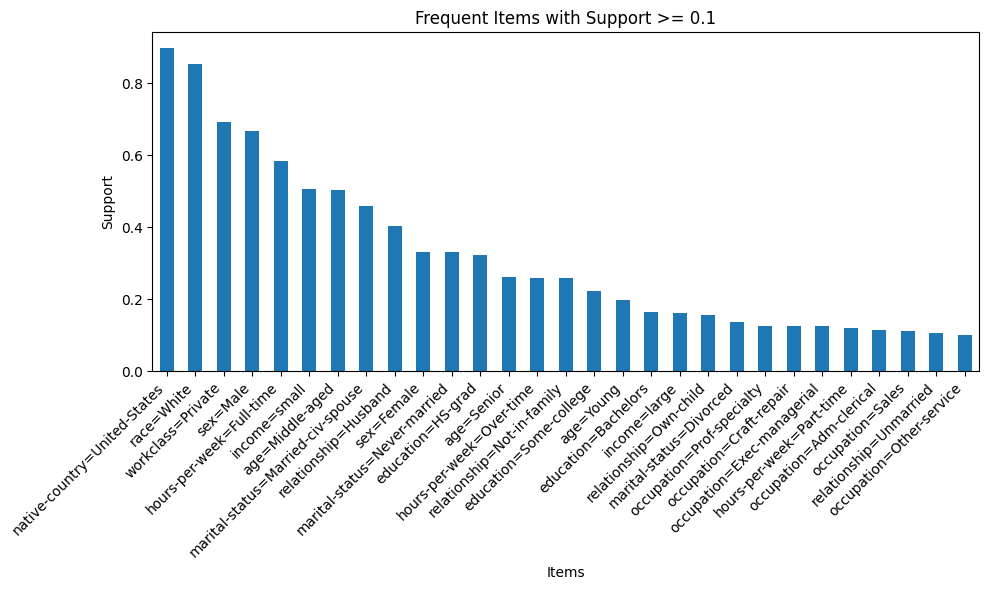

In [349]:
# Code to calculate support
support = adultUCI_dummies.mean()

# Code to filter items with support >= 0.1
support_threshold = 0.1
frequent_items = support[support >= support_threshold]

# Code to create bar chart
plt.figure(figsize=(10, 6))
frequent_items.sort_values(ascending=False).plot(kind='bar')
plt.title('Frequent Items with Support >= 0.1')
plt.xlabel('Items')
plt.ylabel('Support')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- 1.7. Which two items have very high support (proportionally)? Can you conclude from this that the administered questionnaire a good example of a random sample?

In [350]:
print(colored(f"Two items with very high support: {frequent_items.sort_values(ascending=False).index[0]} and {frequent_items.sort_values(ascending=False).index[1]}", outputColor))
print(colored(f"So no it's not a good example of a random sample.", outputColor))

Two items with very high support: native-country=United-States and race=White
So no it's not a good example of a random sample.


- 1.8. Apply the apriori and association_rules algorithms with the following parameters:
    - support= `0.05`,
    - confidence=`0.6`,
    - min_len=`2`, max_len=`3`.

In [351]:
support = 0.05
confidence = 0.6
min_len = 2
max_len = 3

apriori = apriori(adultUCI_dummies, min_support=support, use_colnames=True, max_len=max_len)

rules = association_rules(apriori, metric='confidence', min_threshold=confidence)
rules = rules.drop(columns=['leverage', 'conviction', 'zhangs_metric'])

- 1.9. You can use the following filter function in combination with the .apply function of a DataFrame 'def rule_filter(row, min_len, max_len):' How many rules did the algorithm find?

In [352]:
rules = rules[rules.apply(rule_filter, min_len=min_len, max_len=max_len, axis=1)]
print(colored(f"The algorithm found {rules.shape[0]} rules.", outputColor))

The algorithm found 1112 rules.


- 1.10. View the rules with the highest confidence? What stands out?

In [353]:
display(rules.sort_values(by='confidence', ascending=False).head())
print(colored(f"The men in the dataset are the husband.", outputColor))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
935,"(relationship=Husband, occupation=Prof-specialty)",(sex=Male),0.055137,0.668482,0.055137,1.0,1.495926
705,"(relationship=Husband, education=Some-college)",(sex=Male),0.074895,0.668482,0.074895,1.0,1.495926
967,"(relationship=Husband, hours-per-week=Over-time)",(sex=Male),0.147230,0.668482,0.147230,1.0,1.495926
912,"(relationship=Husband, occupation=Exec-manager...",(sex=Male),0.066152,0.668482,0.066152,1.0,1.495926
973,"(relationship=Husband, income=large)",(sex=Male),0.121166,0.668482,0.121166,1.0,1.495926


The men in the dataset are the husband.


- 1.11. Can you explain why there is such a high confidence in this case?

In [354]:
print(colored(f"In a stereotypical world, a husband is a man.Therefore, the confidence is quite high.", outputColor))

In a stereotypical world, a husband is a man.Therefore, the confidence is quite high.


- 1.12. That rule and variations on that rule are pretty useless. Therefore, remove the `relationship` column on the original data.

In [355]:
adultUCI = pd.read_csv('../Data/AdultUCI.csv', delimiter=';', decimal=',')
adultUCI = adultUCI.drop(columns=['fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'relationship'])
adultUCI['age'] = pd.cut(adultUCI['age'], bins=[15, 25, 45, 65, 100], labels=['Young', 'Middle-aged', 'Senior', 'Old'])
adultUCI['hours-per-week'] = pd.cut(adultUCI['hours-per-week'], bins=[0, 25, 40, 60, 168], labels=["Part-time", "Full-time", "Over-time", "Workaholic"])

- 1.13. Run the apriori algorithm again. Which rule has the greatest confidence?

In [375]:
from mlxtend.frequent_patterns import apriori
support=0.05
confidence=0.6
max_len=3
min_len=2

adultUCI_dummies = pd.get_dummies(adultUCI, prefix_sep='=', dtype=bool)

apriori = apriori(adultUCI_dummies, min_support=support, use_colnames=True, max_len=max_len)

rules = association_rules(apriori, metric='confidence', min_threshold=confidence).drop(columns=['leverage', 'conviction', 'zhangs_metric'])

display(rules.sort_values(by='confidence', ascending=False).head(1))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
606,"(occupation=Craft-repair, marital-status=Marri...",(sex=Male),0.07817,0.668482,0.077147,0.986904,1.476336


- 1.14. If you look at the Lift of this line, would you still consider it a good association consider rule?

In [357]:
if rules.sort_values(by='confidence', ascending=False).head(1)['lift'].values[0] > 1:
    print(colored(f"Yes, it is a good association rule because the lift is greater than 1", outputColor))
else:
   print(colored(f"No, it is not a good association rule because the lift is less than 1", outputColor))

Yes, it is a good association rule because the lift is greater than 1


- 1.15. If a respondent indicates that he works overtime (`hours-per-week`) and has a limited income (`income = small`), in which age category can we expect him to be? How sure are you of that?

In [358]:
age = rules[(rules['antecedents'] == {'hours-per-week=Over-time', 'income=small'})]['consequents'].values[0]
confidence = rules[(rules['antecedents'] == {'hours-per-week=Over-time', 'income=small'})]['confidence'].values[0]

print(colored(f"The respondent is in the age category: {age} with a confidence of {confidence}", outputColor))

The respondent is in the age category: frozenset({'age=Middle-aged'}) with a confidence of 0.6160589758916118


- 1.16. Describe what the lift says about the rule used in n.

In [359]:
lift = rules[(rules['antecedents'] == {'hours-per-week=Over-time', 'income=small'})]['lift'].values[0]
print(colored(f"Lift {lift}", outputColor))
if lift > 1:
    print(colored(f"It is a good association rule because the lift is greater than 1", outputColor))
else:
    print(colored(f"It is not a good association rule because the lift is less than 1", outputColor))

Lift 1.2196324632361115
It is a good association rule because the lift is greater than 1


- 1.17. Does the combination of the three items from the previous 2 questions occur often? What number do you have?
used for this?

In [360]:
confidence = rules[(rules['antecedents'] == {'hours-per-week=Over-time', 'income=small'})]['confidence'].values[0]
print(colored(f"The number we use to calculate this is the confidence.\nI'm confident that it will occur {round(confidence*100, 2)}% of the time.", outputColor))

The number we use to calculate this is the confidence.
I'm confident that it will occur 61.61% of the time.


- 1.18. Have you come across a rule somewhere that says `hours-per-week=Workaholic`? Can you explain why?
is this so?

In [361]:
print(colored(len(rules[(rules['antecedents'] == {'hours-per-week=Workaholic'})]), outputColor))

print(colored(f"There are zero workaholics because if you want to be a workaholic you have to work 168 hours. So this is 24 hours for 7 days in a row, so a full week. This is not humanly possible.", outputColor))

0
There are zero workaholics because if you want to be a workaholic you have to work 168 hours. So this is 24 hours for 7 days in a row, so a full week. This is not humanly possible.


### Question 2: [Fruit promotion]
A supermarket wants to attract people to the store with a very strong promotion for fruit. Because she If they don't make a profit on that promotion, they want to compensate for that with another type right next to it to produce fruit that will increase the price slightly so that the profit margin on it can partially offset the loss compensate. The store wants to know which fruit to promote and which fruit to use the most has a chance to be purchased with the fruit on promotion.

- 2.1. Use the fruit preferences from the questionnaire dataset (`../Data/FruitPurchase.csv`) toto draw up the rules.

In [362]:
fruitPurchase = pd.read_csv('../Data/FruitPurchase.csv', delimiter=';', decimal=',')
display(fruitPurchase)

,Aardbei,Ananas,Appel,Banaan,Kers,Kiwi,Meloen,Peer,Pruim,Sinaasappel
0,True,True,False,False,False,False,True,False,False,False
1,True,False,False,False,False,True,True,False,False,False
2,True,False,True,False,False,False,False,False,False,True
3,True,False,False,True,True,False,False,False,False,False
4,True,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
94,True,False,True,True,False,False,False,False,False,False
95,True,False,True,True,False,False,False,False,False,False
96,True,False,False,False,False,True,True,False,False,False
97,True,False,True,False,False,False,False,False,False,True


- 2.2 Create association rules using this list. Use the following parameters for the apriori algorithm or the fp-growth algorithm:
    - support=`0.1`
    - confidence=`0.3`
    - min_len=`2`, max_len=`2`)

In [376]:
from mlxtend.frequent_patterns import apriori
support2 = 0.1
confidence2 = 0.3
min_len2 = 2
max_len2 = 2

apriori = apriori(fruitPurchase, min_support=support, use_colnames=True, max_len=max_len)

rules = association_rules(apriori, metric='confidence', min_threshold=confidence).drop(columns=['leverage', 'conviction', 'zhangs_metric'])

- 2.3. Find the association rule with the highest confidence.

In [364]:
display(rules.sort_values(by='confidence', ascending=False).head(1))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
935,"(relationship=Husband, occupation=Prof-specialty)",(sex=Male),0.055137,0.668482,0.055137,1.0,1.495926


- 2.4. Which fruit will the store promote based on that rule?

In [365]:
top_antecedent=rules.sort_values(by='confidence', ascending=False).head(1)['antecedents'].values[0]
print(colored(f"The store will put {top_antecedent } on promotion.", outputColor))

The store will put frozenset({'relationship=Husband', 'occupation=Prof-specialty'}) on promotion.


- 2.5. Based on that rule, which fruit will the store place next to the promotional item?

In [366]:
top_consequents=rules.sort_values(by='confidence', ascending=False).head(1)['consequents'].values[0]
print(colored(f"The store will put {top_consequents } on promotion.", outputColor))

The store will put frozenset({'sex=Male'}) on promotion.


- 2.6. What percentage of the students who completed the questionnaire have the combination of the two fruit types are in their top 3?

In [367]:
top_support=rules.sort_values(by='confidence', ascending=False).head(1)['support'].values[0]
print(colored(f"There is a {round(top_support*100,2)}% chance that {top_antecedent} and {top_consequents} are in the top 3 among students.", outputColor))

There is a 5.51% chance that frozenset({'relationship=Husband', 'occupation=Prof-specialty'}) and frozenset({'sex=Male'}) are in the top 3 among students.


- 2.7. What can you say about the fruit in promotion based on the lift?

In [368]:
lift=rules.sort_values(by='confidence', ascending=False).head(1)['lift'].values[0]
print(colored(f"Lift: {lift}", outputColor))
if lift > 1:
    print(colored(f"It is a good association rule because the lift is greater than 1", outputColor))
else:
    print(colored(f"It is not a good association rule because the lift is less than 1", outputColor))

Lift: 1.495926493108729
It is a good association rule because the lift is greater than 1


## Exercises Repetition (Week 6)

### Question 1:
A theoretical driving test contains `50` multiple choice questions. You must get `43/50` to pass. Suppose each multiple-choice question has `4` possible answers.

- What is the chance of success (`43/50`) when you only gamble (`4` options)?
- What is the chance of passing if you are sure of `35` questions (and therefore have guessed `15` times)?
- What is the probability of passing (`43/50`) if you are just guessing and there are only `2` options per question?

In [377]:
# Technique used: The Binomial Distribution

k = 43 - 1     # Probability of exactly k successes
n = 50         # Number of trials
p = 1 / 4      # Probability of success in each trial
probability = 1 - binomial.cdf(k, n, p)
print(colored(f"The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

k = 43 - 15    # Probability of exactly k successes
n = 50         # Number of trials
p = 1 / 4      # Probability of success in each trial
probability = 1 - binomial.cdf(k, n, p)
print(colored(f"The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

k = 43 - 1     # Probability of exactly k successes
n = 50         # Number of trials
p = 1 / 2      # Probability of success in each trial
probability = 1 - binomial.cdf(k, n, p)
print(colored(f"The probability is as follows: {round(probability, 4)} or {round(probability * 100, 4)}%.", outputColor))

The probability is as follows: 0.0 or 0.0%.
The probability is as follows: 0.0 or 0.0001%.
The probability is as follows: 0.0 or 0.0%.


### Question 2:
The average study time per course is `4.5 hours` per week in the course. We want to determine whether the study time of the course differs significantly from the average for the Data Science course (based on a sample). Use the input file for this `/StudyResult.csv`.

- What alternative hypothesis can we use?
- What is the acceptance interval for the study time of the course at `a=0.05`? Also write down how you arrived at this number.
- What value for the factor did you use to calculate the acceptance interval?
- What can you say about the null hypothesis?
- Calculate the p-value that you can use to support this claim (at `a=0.05`).
- Form a conclusion based on the p-value. Complete the following sentence (in any case, use the obtained p-value in your conclusion): If the average study duration of the population is `4.5 HOURS`, then

In [379]:
studyResult = pd.read_csv('../Data/StudyResult.csv', delimiter=';', decimal=',')

print(colored(f"H0: The average study time of the population is 4.5 HOURS (= 4.5)\nH1: The average study time of the population is not 4.5 HOURS (!= 4.5)", outputColor))

a = 0.05
x_bar = studyResult['study time'].mean()
s = studyResult['study time'].std()
n = len(studyResult)
df = n - 1
p = 1 - a

interval = student.interval(confidence=p, df=df, loc=x_bar, scale=s / math.sqrt(n))
print(colored(f"Confidence Interval: {interval}", outputColor))

factor=student.ppf((1 + p) / 2, df=df) # Factor = Z-Score
print(colored(f"Factor: {factor}", outputColor))

p_value = ttest_1samp(studyResult['study time'], 4.5).pvalue
if p_value < a:
    print(colored(f"Reject H0", outputColor))
else:
    print(colored(f"Fail to reject H0", outputColor))
    
print(colored(f"P Value: {p_value}", outputColor))

print(colored(f"If the average study duration of the population is 4.5 HOURS, then the probability of observing students who study more or less than 4.5 HOURS is {p_value}.", outputColor))

H0: The average study time of the population is 4.5 HOURS (= 4.5)
H1: The average study time of the population is not 4.5 HOURS (!= 4.5)
Confidence Interval: (3.8767239334848833, 4.273655813350561)
Factor: 1.96600320134879
Reject H0
P Value: 3.19125975826884e-05
If the average study duration of the population is 4.5 HOURS, then the probability of observing students who study more or less than 4.5 HOURS is 3.19125975826884e-05.
